In [1]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [2]:
SEED_VALUE = 42

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"Training: {X_train.shape}\nTesting: {X_test.shape}")

Training: (50000, 32, 32, 3)
Testing: (10000, 32, 32, 3)


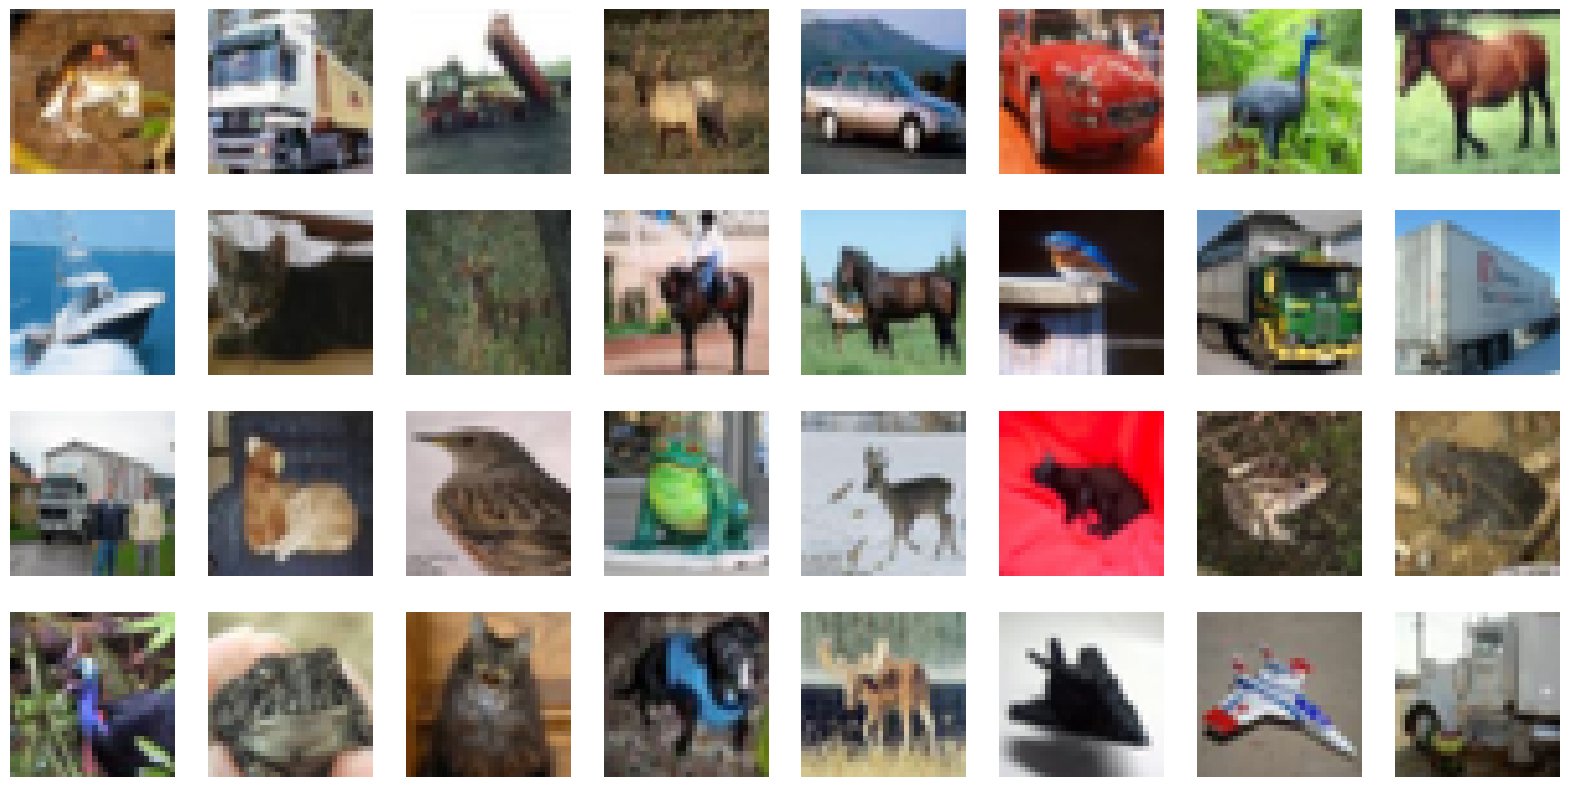

In [4]:
num_rows = 4
num_cols = 8

plt.figure(figsize=(20, 10))
for i in range(num_rows * num_cols):
  ax = plt.subplot(num_rows, num_cols, i + 1)
  plt.imshow(X_train[i, : , :])
  plt.axis('off')

In [5]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float') / 255

print(f"Target class before one-hot: {y_train[0]}")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Target class after one-hot: {y_train[0]}")

Target class before one-hot: [6]
Target class after one-hot: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
@dataclass(frozen=True)
class DatasetConfig:
  NUM_CLASSES:  int  = 10
  IMG_WIDTH:    int  = 32
  IMG_HEIGHT:   int  = 32
  NUM_CHANNELS: int  = 3

@dataclass(frozen=True)
class TrainingConfig:
  BATCH_SIZE:      int = 256
  EPOCHS:          int = 31
  LEARNING_RATE: float = 0.001

In [7]:
def CNNetwork(input_shape=(32, 32, 3)):
    model = Sequential()

    #-------------------------------------
    #CONV Block 1: 32 Filters, MaxPool
    #-------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #-------------------------------------
    #CONV Block 2: 64 Filters, MaxPool
    #-------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #-------------------------------------
    #CONV Block 3: 64 Filters, MaxPool
    #-------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #-------------------------------------
    # Fully connected layers; flattens the convolutional features.
    #-------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))


    return model

In [8]:
model = CNNetwork()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train,
                    epochs=TrainingConfig.EPOCHS,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    validation_split=0.3,
                    verbose=1
                    )

Epoch 1/31
137/137 [==============================] - 13s 53ms/step - loss: 2.1444 - accuracy: 0.2066 - val_loss: 2.6317 - val_accuracy: 0.1800
Epoch 2/31
137/137 [==============================] - 3s 24ms/step - loss: 1.7606 - accuracy: 0.3648 - val_loss: 1.6738 - val_accuracy: 0.3865
Epoch 3/31
137/137 [==============================] - 3s 22ms/step - loss: 1.5205 - accuracy: 0.4515 - val_loss: 1.3877 - val_accuracy: 0.4869
Epoch 4/31
137/137 [==============================] - 3s 20ms/step - loss: 1.3530 - accuracy: 0.5126 - val_loss: 1.4285 - val_accuracy: 0.4852
Epoch 5/31
137/137 [==============================] - 3s 20ms/step - loss: 1.2126 - accuracy: 0.5667 - val_loss: 1.3585 - val_accuracy: 0.5207
Epoch 6/31
137/137 [==============================] - 3s 22ms/step - loss: 1.0902 - accuracy: 0.6141 - val_loss: 1.0748 - val_accuracy: 0.6215
Epoch 7/31
137/137 [==============================] - 3s 20ms/step - loss: 0.9746 - accuracy: 0.6553 - val_loss: 0.9524 - val_accuracy: 0.666

In [11]:
def plot_results(metrics, title=None, ylim=None, ylabel=None, metric_name=None, color=None):
  fig, ax = plt.subplots(figsize=(12, 5))

  if not (isinstance(metric_name, list) or (isinstance(metric_name, tuple))):
    metrics = [metrics, ]
    metric_name = [metric_name]

  for idx, metric in enumerate(metrics):
    ax.plot(metric, color=color[idx])

  plt.xlabel('Epochs')
  plt.ylabel(ylabel)
  plt.xlim([0, TrainingConfig.EPOCHS - 1])
  plt.ylim(ylim)
  plt.title(title)

  ax.xaxis.set_major_locator(MultipleLocator(5))
  ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
  ax.xaxis.set_minor_locator(MultipleLocator(1))

  plt.grid()
  plt.legend(metric_name)
  plt.show()
  plt.close()

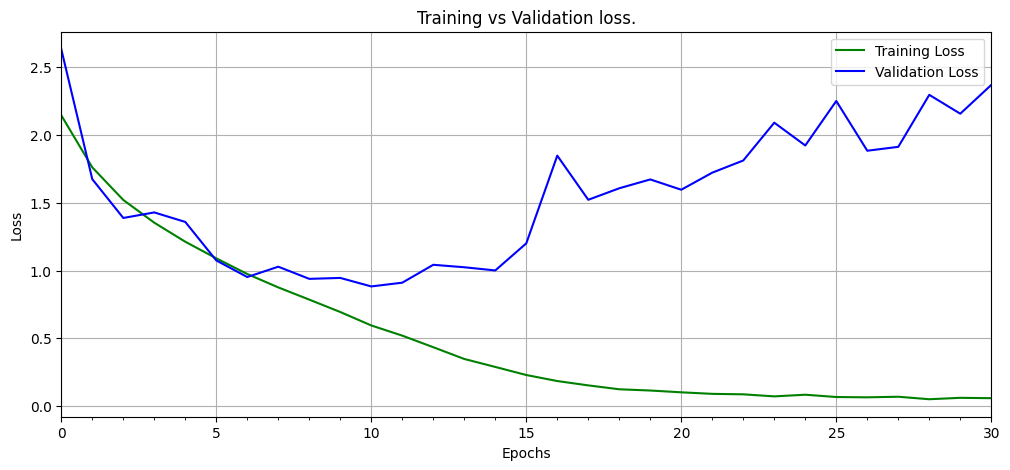

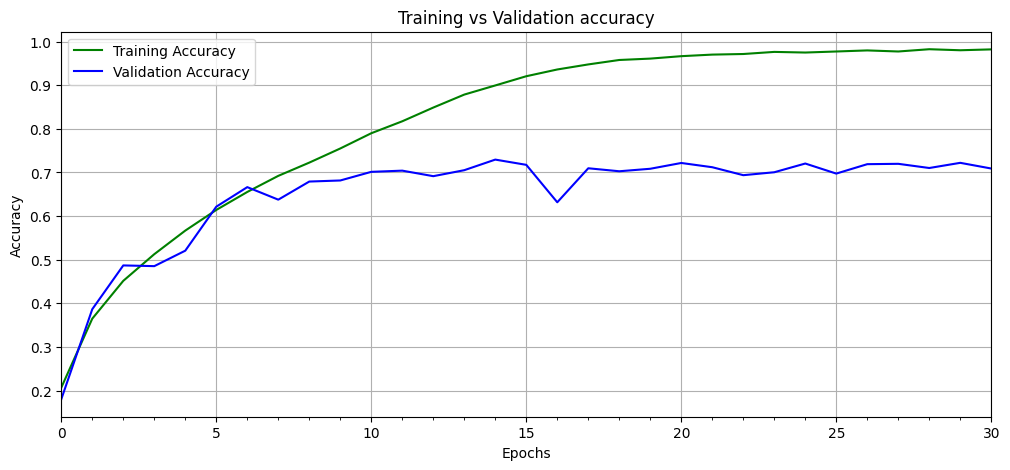

In [12]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plot_results(metrics=[train_loss, val_loss],
             ylabel='Loss', title='Training vs Validation loss.',
             metric_name=['Training Loss', 'Validation Loss'],
             color=['g', 'b'])

plot_results(metrics=[train_acc, val_acc],
             ylabel='Accuracy', title='Training vs Validation accuracy',
             metric_name=['Training Accuracy', 'Validation Accuracy'],
             color=['g', 'b'])

- Model is definitely overfitting.
- Introduce dropout layer to handle this.

In [13]:
def CNNetwork_Drop(input_shape=(32, 32, 3)):
    model = Sequential()

    #-------------------------------------
    #CONV Block 1: 32 Filters, MaxPool
    #-------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #-------------------------------------
    #CONV Block 2: 64 Filters, MaxPool
    #-------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #-------------------------------------
    #CONV Block 3: 64 Filters, MaxPool
    #-------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    #-------------------------------------
    # Fully connected layers; flattens the convolutional features.
    #-------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))


    return model

In [14]:
model_dropout = CNNetwork_Drop()
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [17]:
model_dropout.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [18]:
history = model_dropout.fit(X_train,
                            y_train,
                            epochs=TrainingConfig.EPOCHS,
                            batch_size=TrainingConfig.BATCH_SIZE,
                            validation_split=.3,
                            verbose=1)

Epoch 1/31
137/137 [==============================] - 7s 33ms/step - loss: 2.1421 - accuracy: 0.2117 - val_loss: 1.9918 - val_accuracy: 0.2713
Epoch 2/31
137/137 [==============================] - 4s 26ms/step - loss: 1.8344 - accuracy: 0.3335 - val_loss: 1.6258 - val_accuracy: 0.3991
Epoch 3/31
137/137 [==============================] - 4s 28ms/step - loss: 1.6364 - accuracy: 0.4057 - val_loss: 1.4436 - val_accuracy: 0.4706
Epoch 4/31
137/137 [==============================] - 4s 27ms/step - loss: 1.4887 - accuracy: 0.4629 - val_loss: 1.3708 - val_accuracy: 0.5066
Epoch 5/31
137/137 [==============================] - 4s 26ms/step - loss: 1.3765 - accuracy: 0.5048 - val_loss: 1.4729 - val_accuracy: 0.4783
Epoch 6/31
137/137 [==============================] - 4s 26ms/step - loss: 1.2689 - accuracy: 0.5443 - val_loss: 1.3174 - val_accuracy: 0.5303
Epoch 7/31
137/137 [==============================] - 4s 27ms/step - loss: 1.1793 - accuracy: 0.5790 - val_loss: 1.1222 - val_accuracy: 0.6055

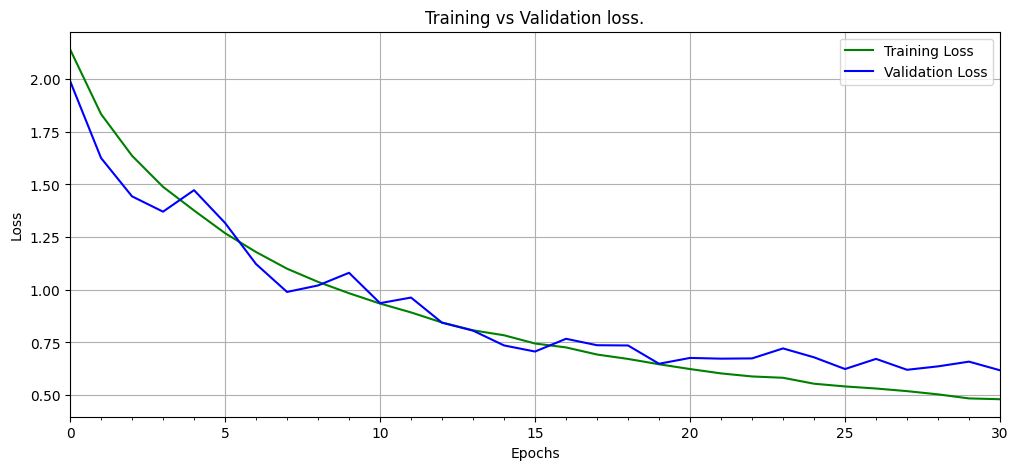

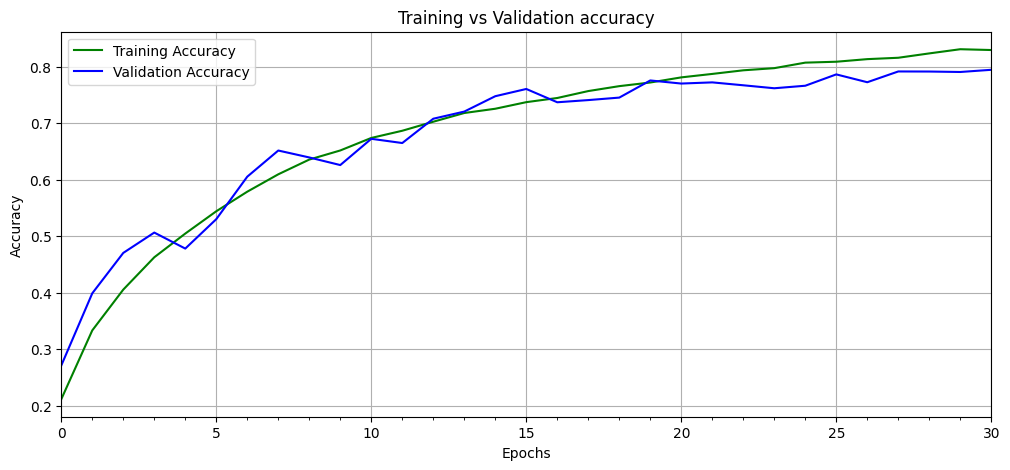

In [19]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plot_results(metrics=[train_loss, val_loss],
             ylabel='Loss', title='Training vs Validation loss.',
             metric_name=['Training Loss', 'Validation Loss'],
             color=['g', 'b'])

plot_results(metrics=[train_acc, val_acc],
             ylabel='Accuracy', title='Training vs Validation accuracy',
             metric_name=['Training Accuracy', 'Validation Accuracy'],
             color=['g', 'b'])

- Saving the model.

In [20]:
model_dropout.save('model_dropout')

- Load.

In [21]:
from tensorflow.keras import models

dropout = models.load_model('model_dropout')

dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

## Model evaluation.
- Using .evaluate.

In [22]:
test_loss, test_acc = dropout.evaluate(X_test, y_test)

print(f"Test accuracy: {test_acc * 100:.3f}")

313/313 [==============================] - 2s 5ms/step - loss: 0.6428 - accuracy: 0.7884
Test accuracy: 78.840


- Evaluating on a subset of images.

In [35]:
def evaluate_model(dataset, model):
  classes = ['aeroplane', 'automobile',
             'bird', 'cat', 'deer',
             'dog', 'frog', 'horse',
             'ship', 'truck', ]

  num_rows = 3
  num_cols = 6

  #Retrieve a number of images from the dataset.
  image_batch = dataset[0 : num_rows * num_cols]

  #Get predictions from model.
  predictions = model.predict(image_batch)

  plt.figure(figsize=(20, 10))
  num_matches = 0

  for idx in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, idx + 1)
    plt.imshow(image_batch[idx])
    plt.axis('off')

    pred_idx = tf.argmax(predictions[idx]).numpy()
    truth_idx = np.nonzero(y_test[idx])

    title = str(classes[truth_idx[0][0]]) + ' : ' + str(classes[pred_idx])
    title_obj = plt.title(title, fontdict= {'fontsize':14})


    if pred_idx == truth_idx:
      num_matches += 1
      plt.setp(title_obj, color='g')
    else:
      plt.setp(title_obj, color='r')

    acc = num_matches / (idx + 1)
  print("Prediction accuracy", int(100 * acc) / 100)

  return

1/1 [==============================] - 0s 32ms/step
Prediction accuracy 0.94


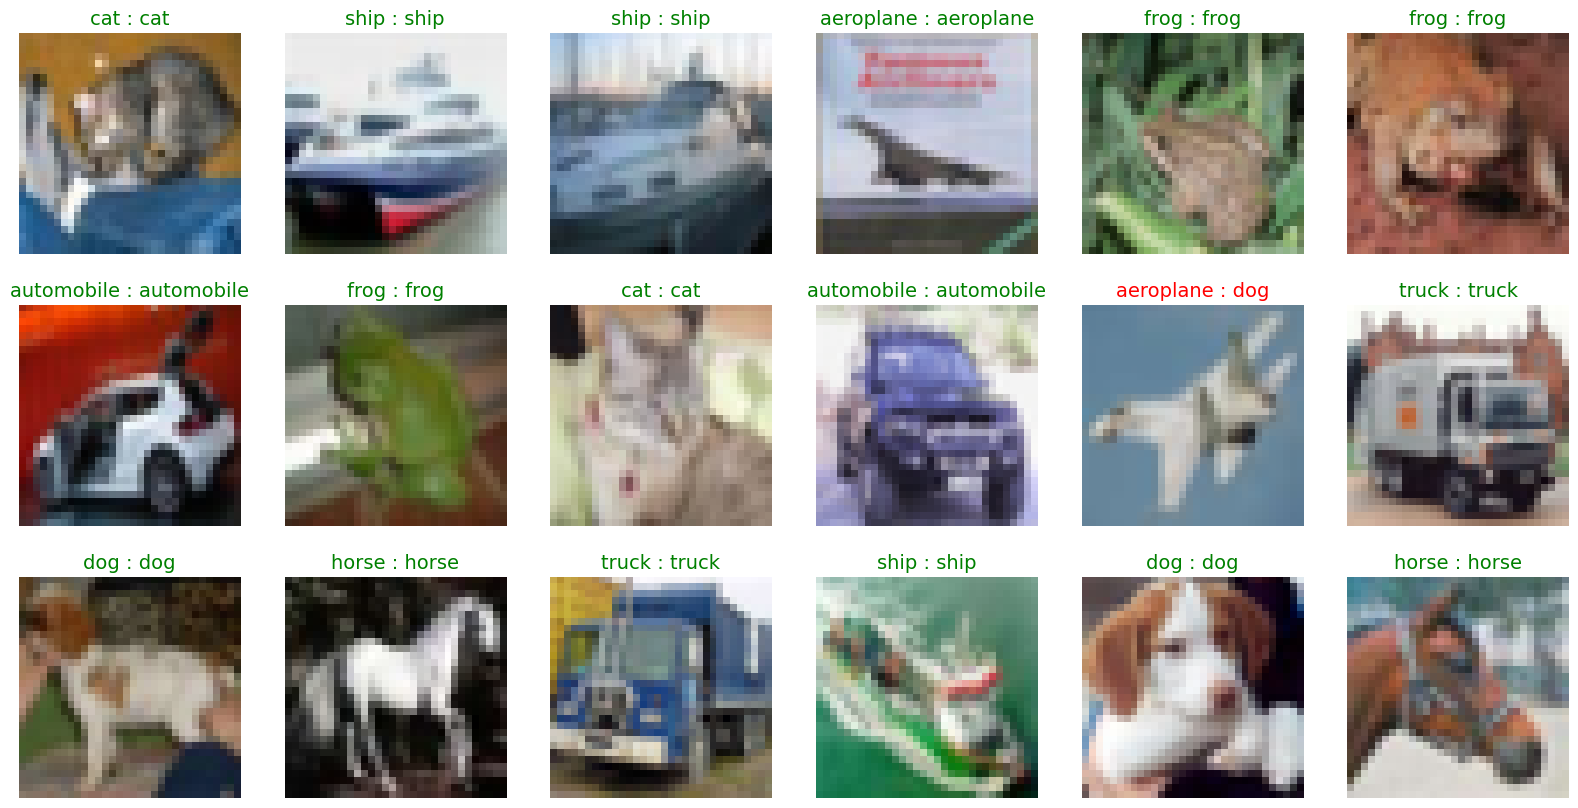

In [36]:
evaluate_model(X_test, dropout)

- Confusion matrix.

In [37]:
predictions = dropout.predict(X_test)

predicted_labels = [np.argmax(i) for i in predictions]

313/313 [==============================] - 1s 4ms/step


In [44]:
classes = ['aeroplane', 'automobile',
             'bird', 'cat', 'deer',
             'dog', 'frog', 'horse',
             'ship', 'truck', ]

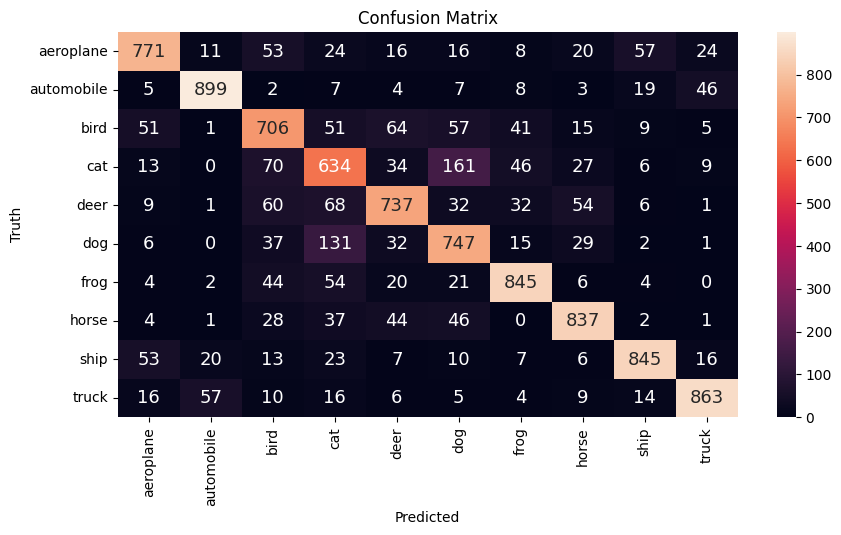

In [48]:
y_test_integer = tf.argmax(y_test, axis=1)

cm = tf.math.confusion_matrix(labels=y_test_integer, predictions=predicted_labels)

plt.figure(figsize=(10, 5))
import seaborn as sns
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size':13},
                 xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [2]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [4]:
!git remote add origin https://github.com/Njaramba-Riri/Tensorflow

In [5]:
!git remote -v

origin	https://github.com/Njaramba-Riri/Tensorflow (fetch)
origin	https://github.com/Njaramba-Riri/Tensorflow (push)


In [6]:
!git branch -M colab

In [15]:
!git status

On branch colab

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)
